In [56]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows', 100)

### Load and explore the data

In [23]:
'''
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet
'''

house_data_1 = pd.read_csv("../data/Housing_data/housing-classification-iter-0-2.csv")

print(house_data_1.info())
print(house_data_1.isna().sum())
house_data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB
None
LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64


,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


### Split the data into train and test sets

In [44]:
X = house_data_1.drop(columns=['Expensive'])
y = house_data_1['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Fill missing values

In [50]:
# Specify numerical columns which need values filled
num_cols = ['LotFrontage']

# define missing values imputer strategy
imp_num = SimpleImputer(strategy="median")

X_train[num_cols] = imp_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imp_num.transform(X_test[num_cols])
X_train.isna().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

### Scale the values

In [51]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              index=X_train.index,
                              columns=X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled,
                             index=X_test.index,
                             columns=X_test.columns)

### Apply a Decision Tree model

In [86]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6)

### Visualise the tree

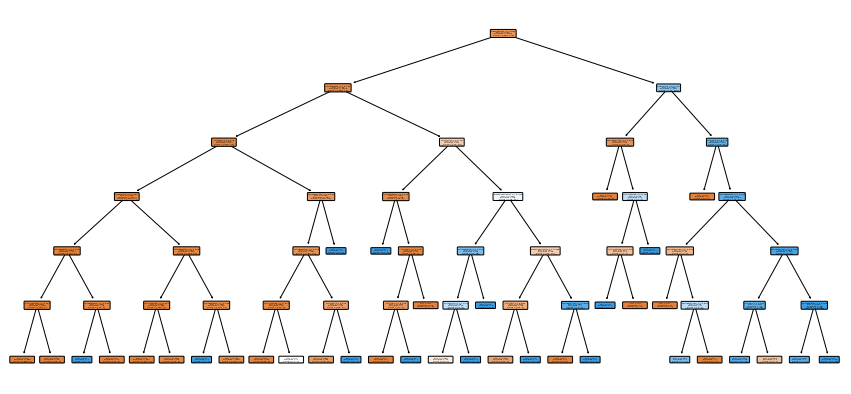

In [90]:
plt.figure(figsize=(15, 7))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Survived','Survived'], 
    feature_names=X_train_scaled.columns
    );

### Check the metrics on train

In [87]:
preds = tree.predict(X_train_scaled)
accuracy_score(preds, y_train)

0.9554794520547946

### Check the metrics on test

In [88]:
preds = tree.predict(X_test_scaled)
accuracy_score(preds, y_test)

0.910958904109589

### Plot a confusion matrix of the results

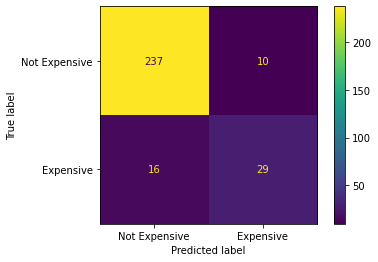

In [89]:
plot_confusion_matrix(tree, X_test_scaled, y_test, display_labels=['Not Expensive', 'Expensive']);